# Vehicle Classification case study - EDA, SVM, & PCA 

The purpose of the case study is to classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

One of the purpose of this case study is to understand any dimensionality curse using PCA.

### Impoting the libraries

In [66]:
#import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


### Loading and Understanding the Dataset 

In [67]:
my_df = pd.read_csv(r'C:\Notebooks\Project 4\vehicle.csv')

In [68]:
my_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


There is a need to encode target variable. i.e. 'Class' column

In [69]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
columns = my_df.columns
#Let's Label Encode our class variable: 
print(columns)
my_df['class'] = le.fit_transform(my_df['class'])


Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


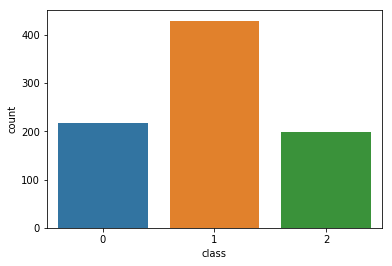

In [70]:
my_df['class'].value_counts()

splitscaledf = my_df.copy()
sns.countplot(my_df['class'])
plt.show()

There is some imbalance in terms of class. This will have some impact on model.

## Exploratory data analysis 

**Objective**: 
    
    - Finding Any Missing Value
    - Finding Outliers
    - Understanding attributes using descriptive statistics
    - Visualizing attribute distribution using univariate and multivariate analysis
    - Finding attribute correlation and analysing which attribute is more important

In [71]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Most of the columns has some missing data, Below mentioned columns has no missing data:
    
    - circularity
    - class
    - hollow_ratio
    - max.length_rectangularity
    - max.length_aspect_ratio
    - compactness 
    
All attributes are of numerical type after encoding target variable.

**We will choose to impute these null values instead of dropping them as dropping these values would result in loss of information.**

In [72]:
from sklearn.impute import SimpleImputer

newdf = my_df.copy()

#separting all numercial independent attribute
X = newdf.iloc[:,0:19]

#fill missing values with mean column values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=1)


transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )


Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


In [73]:
newdf.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388,0.977541
std,8.234474,6.133943,15.740902,33.400979,7.882119,4.601217,33.195188,7.811559,2.588326,14.515652,31.355195,176.457706,32.546223,7.468450,4.903148,8.930792,6.152166,7.438797,0.702130
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,1.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


In [74]:
#Observing imbalance

newdf.groupby('class').count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
0.0,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
1.0,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
2.0,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


**There is a data imbalance as Class 1 i.e. Car has a significantly higher count as compared to other classes i.e. bus and van, while van has the lowest count.**

In [75]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.828775,6.133943,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.110451,15.740902,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.888095,33.400979,104.0,141.00,168.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.678910,7.882119,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.901775,33.195188,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.933728,7.811559,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.582444,2.588326,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


**Compactness has mean and median values almost similar.**

**Circularity : it also seems to be normally distribted as mean amd median has similar values**

**Scatter_ratio feature seems to be having some kind of skewness and outlier**

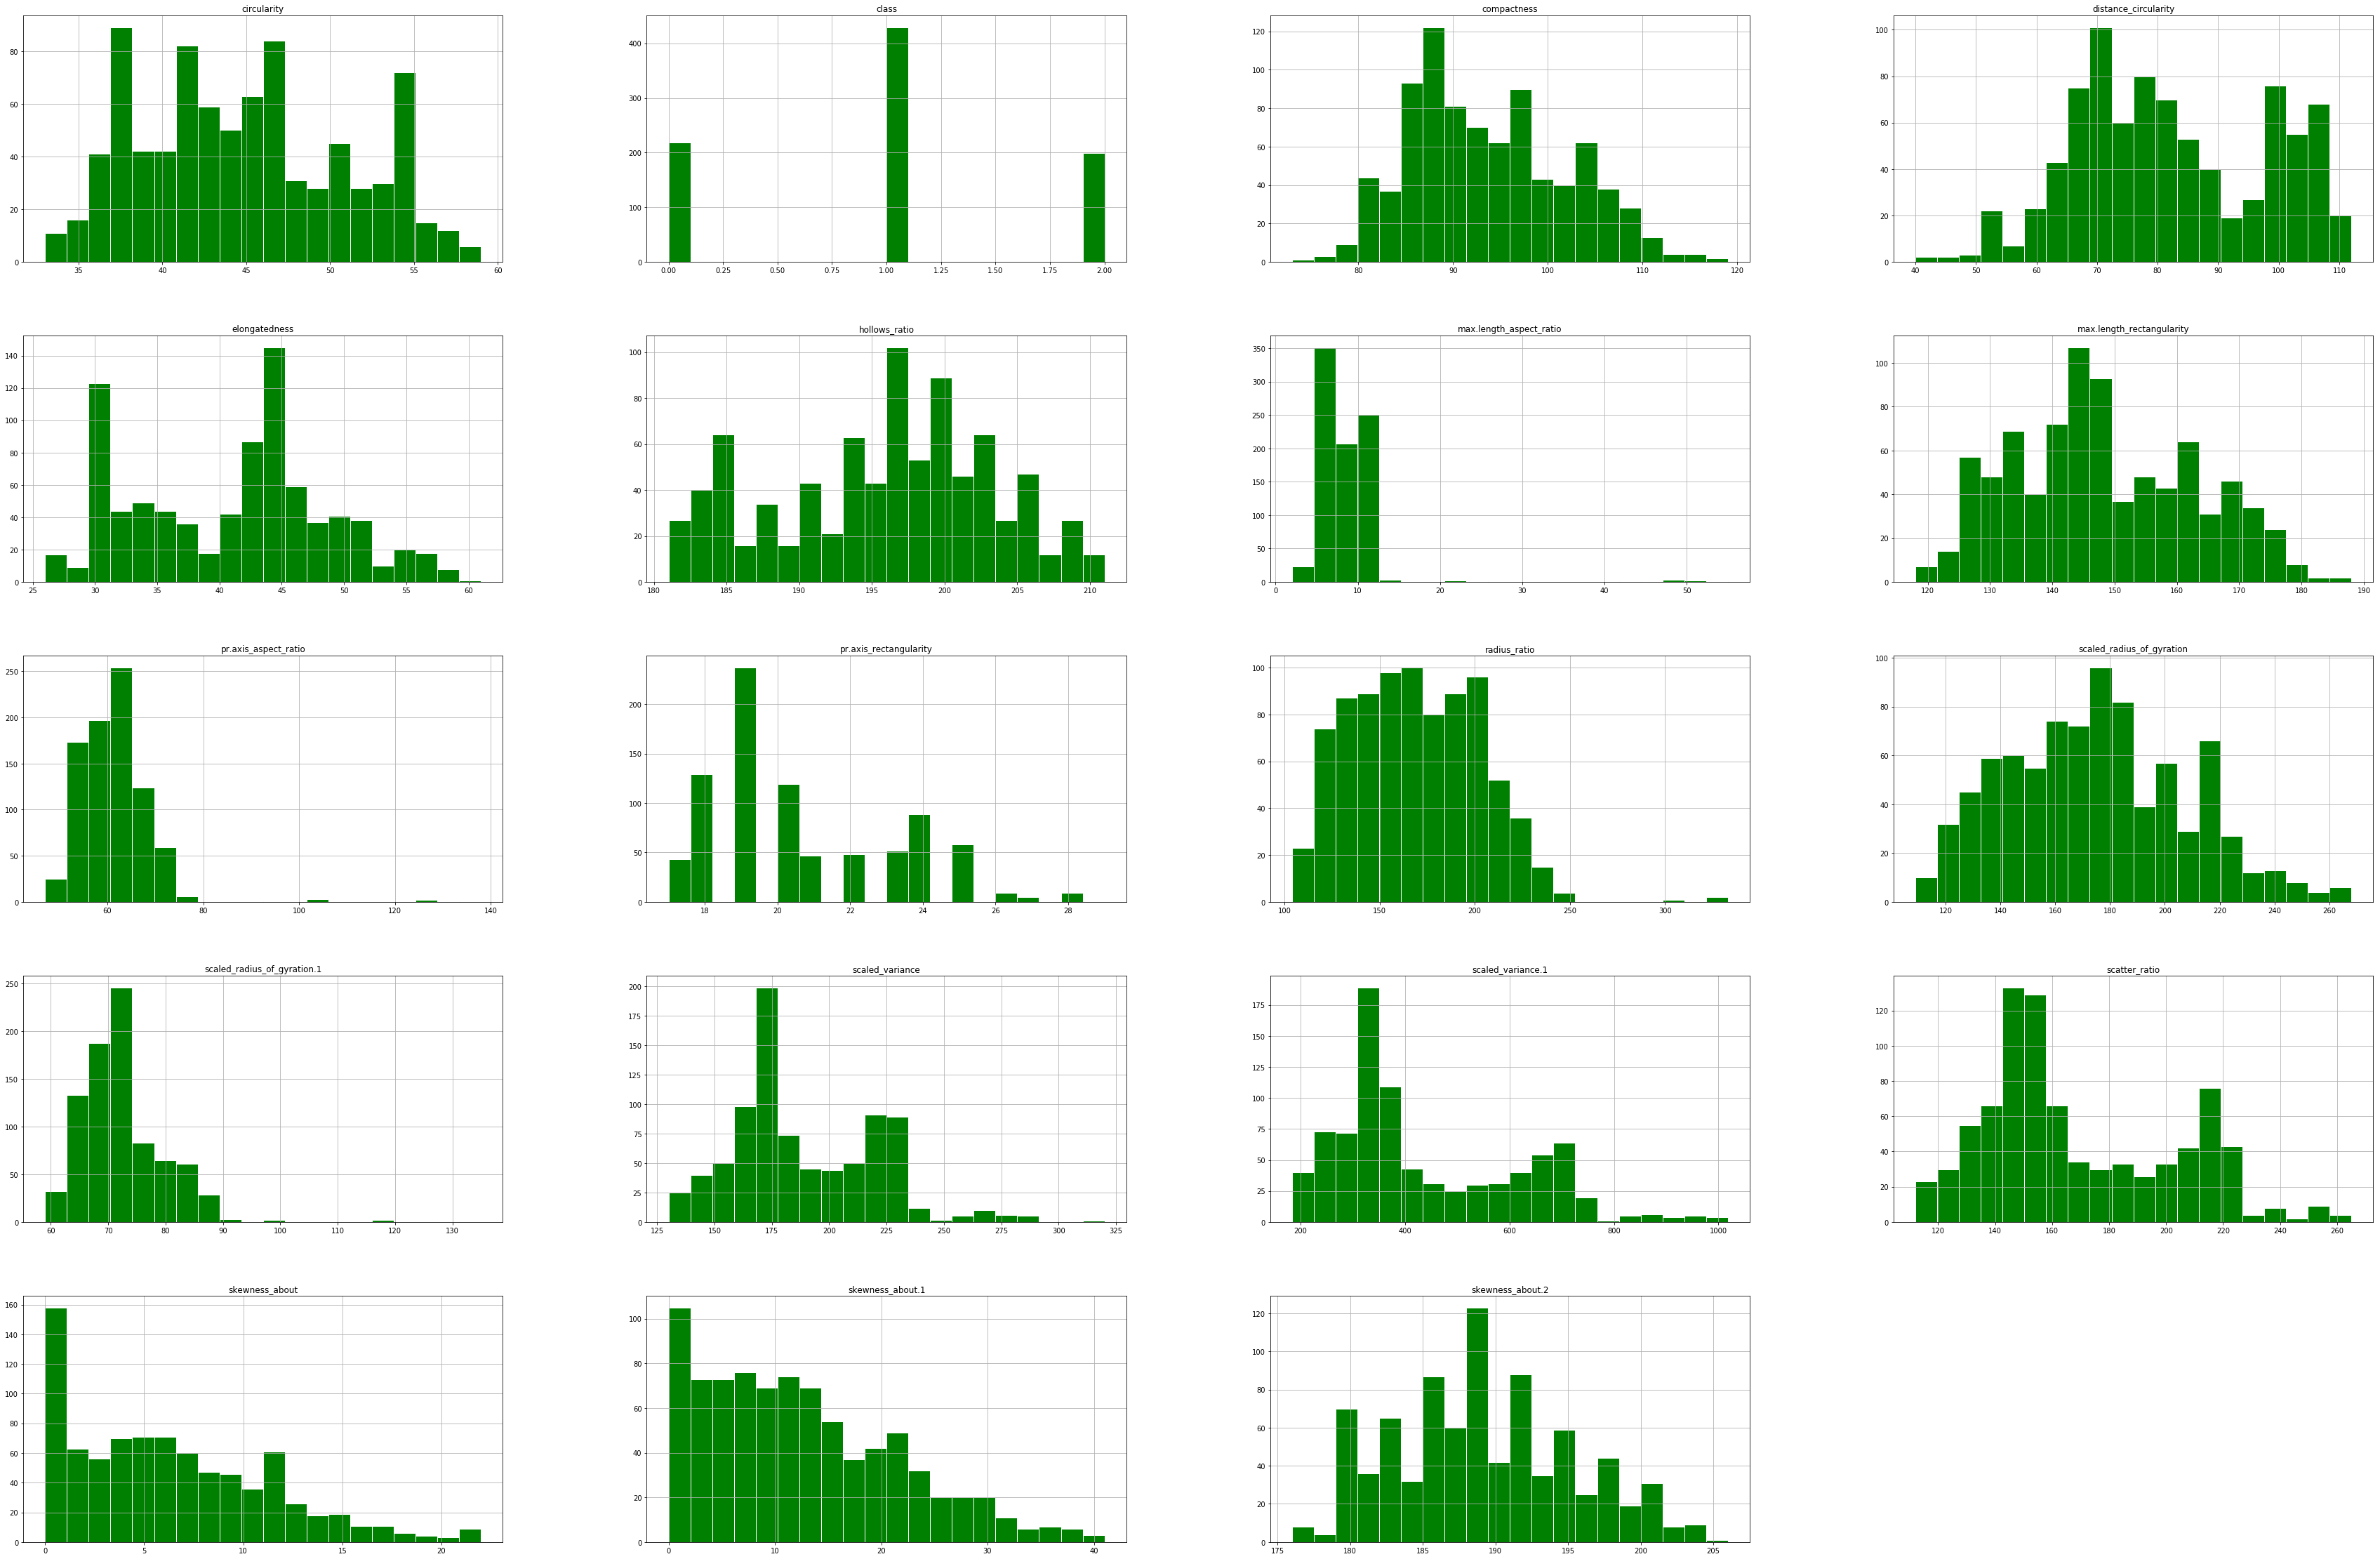

In [76]:
newdf.hist(bins=20, figsize=(60,40), color='green', edgecolor = 'white')
plt.show()

**Most of the data attributes seems to be normally distributed.**

**Scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skwed.**

**pr.axis_rectangularity seems to be haing outliers as there are some gaps found in the bar plot.**

In [77]:
SV = newdf.skew()
print("skewValue of dataframe attributes: ", SV)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.396381
pr.axis_aspect_ratio           3.834882
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.652753
scaled_variance.1              0.843027
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    2.088422
skewness_about                 0.779277
skewness_about.1               0.688423
skewness_about.2               0.249468
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


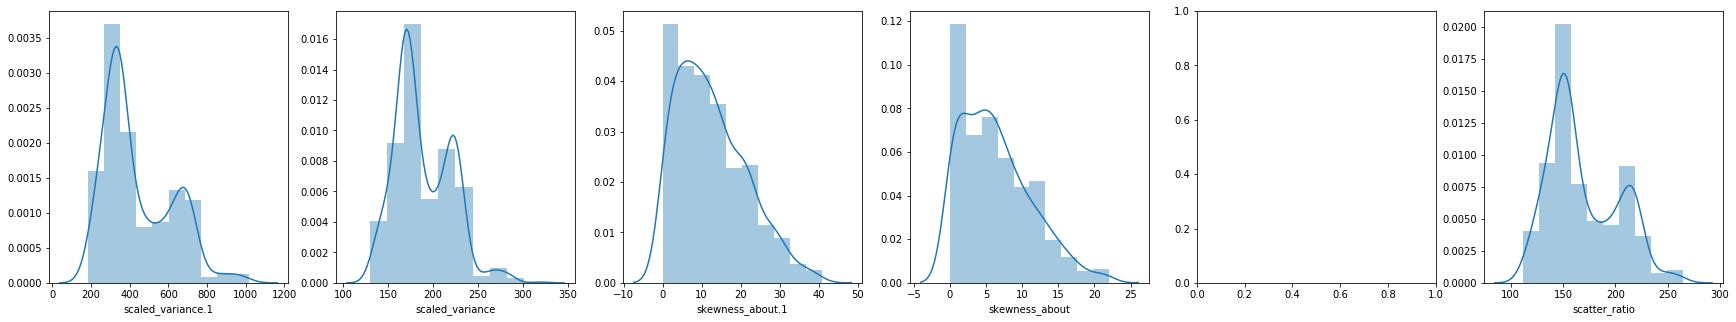

In [78]:
#Let us use seaborn distplot to analyze the distribution of our columns and see the skewness in attributes
f, ax = plt.subplots(1, 6, figsize=(30,5))
vis1 = sns.distplot(newdf["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(newdf["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(newdf["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[5])

f.savefig('subplot.png')

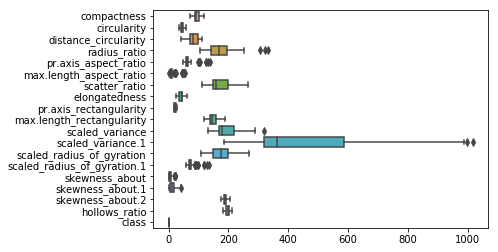

In [79]:
#Tracing Outliers using Box-Plot

ax = sns.boxplot(data=newdf, orient="h")

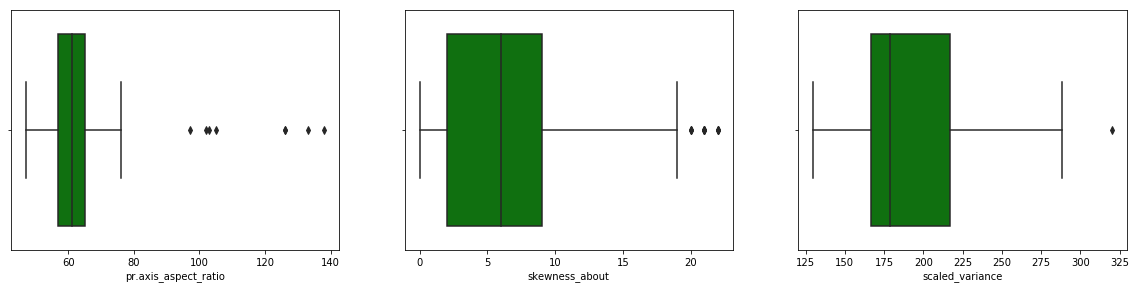

In [80]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.skewness_about, color='green')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.scaled_variance, color='green')

plt.show()

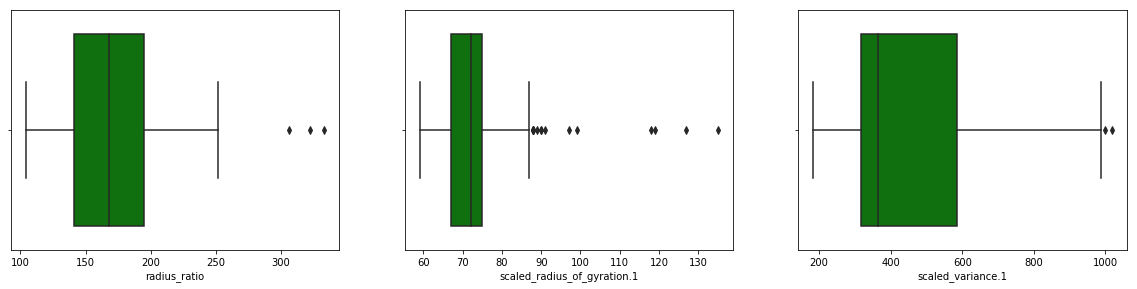

In [81]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['radius_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='green')

plt.subplot(3,3,3)
sns.boxplot(x= newdf['scaled_variance.1'], color='green')

plt.show()

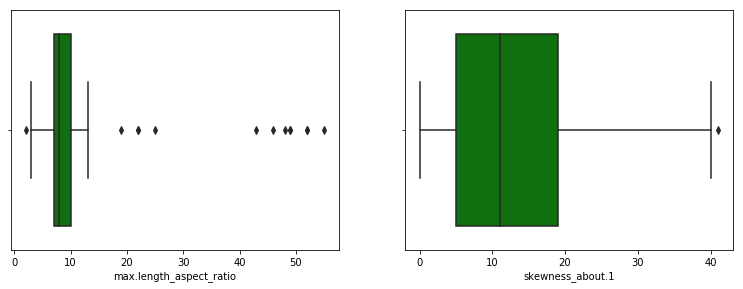

In [82]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['skewness_about.1'], color='green')


plt.show()


**pr.axis_aspect_ratio**

**skewness_about**

**max_length_aspect_ratio**

**skewness_about_1**

**scaled_radius_of_gyration.1**

**scaled_variance.1**

**radius_ratio**

**skewness_about**

**scaled_variance.1**

are some of the attributes with outliers which is visible with all dotted points.


In [83]:
## Removing the outliers

from scipy.stats import iqr

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1

cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(813, 19)

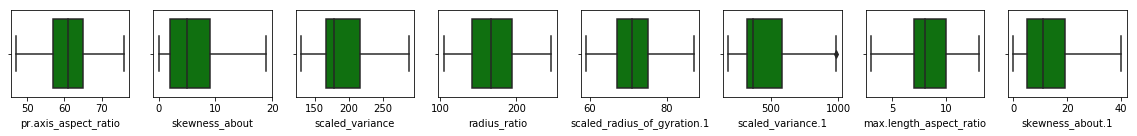

In [84]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'], color='green')

plt.subplot(8,8,2)
sns.boxplot(x= cleandf.skewness_about, color='green')

plt.subplot(8,8,3)
sns.boxplot(x= cleandf.scaled_variance, color='green')
plt.subplot(8,8,4)
sns.boxplot(x= cleandf['radius_ratio'], color='green')

plt.subplot(8,8,5)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'], color='green')

plt.subplot(8,8,6)
sns.boxplot(x= cleandf['scaled_variance.1'], color='green')

plt.subplot(8,8,7)
sns.boxplot(x= cleandf['max.length_aspect_ratio'], color='green')

plt.subplot(8,8,8)
sns.boxplot(x= cleandf['skewness_about.1'], color='green')

plt.show()


**As overall number of outliers is small, we have removed the outliers as observed**
**Generally it should be avoided as that would lead to loss of information**


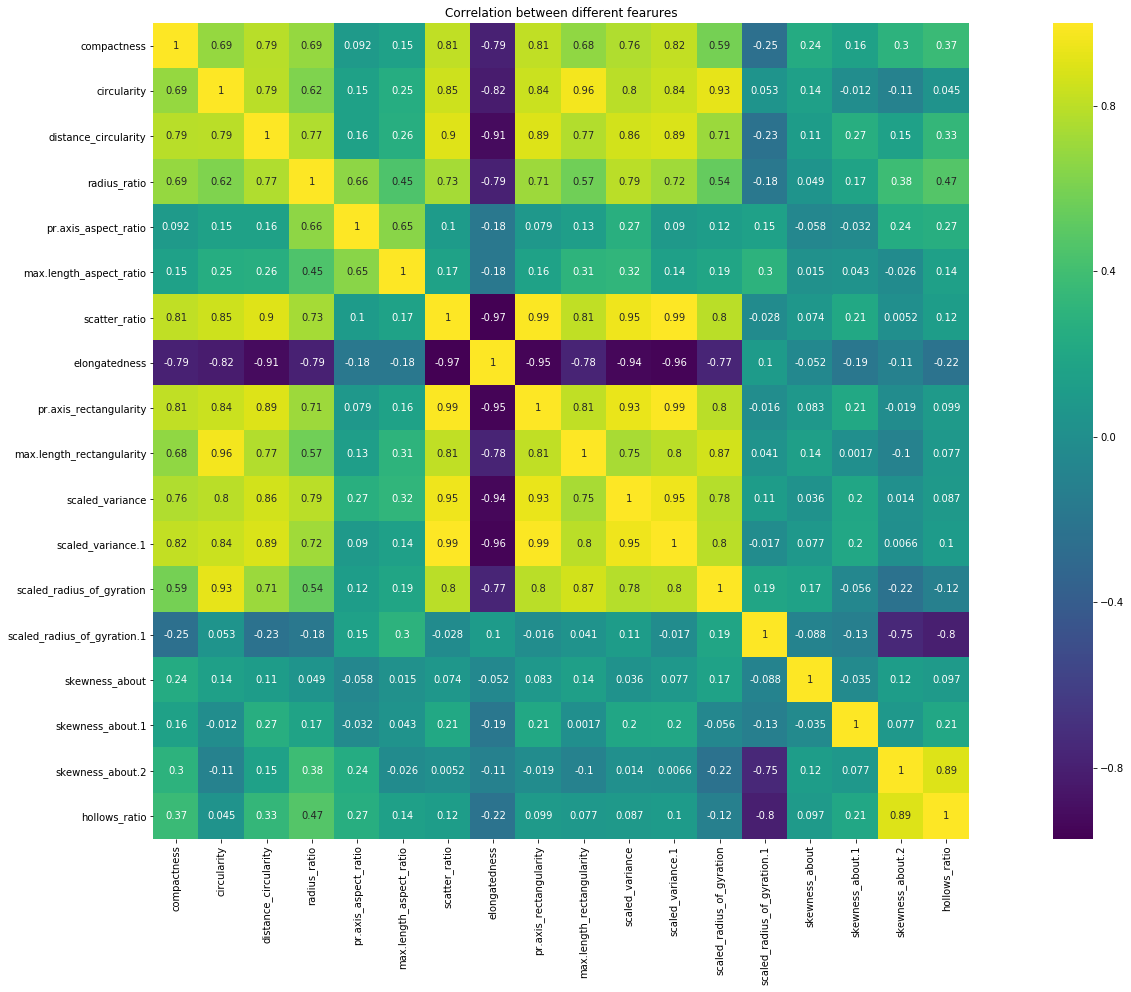

In [85]:
#Understanding Relationships within column using Pearson Correlation Coefficient

def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();

cleandf= newdf.drop('class', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(cleandf, 30,15)
    

**Strong Relationship**

      - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
      - skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
      - ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
      - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
      - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
      - scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
      - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95

**Weak Relationship**

     
      - max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5
      - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
      - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
      - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
      - skewness_about & skewness_about.1 not be correlated
      - skewness_about.1 and skewness_about.2 are not correlated.
      

In [86]:
newdf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,2.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,2.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,2.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,0.0


In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [90]:
accuracies = {}
model = SVC()

data_attr = newdf.drop('class', axis = 1)
data_target = newdf['class']

X_train, X_test, Y_train, Y_test = train_test_split(data_attr, data_target, test_size=0.30, random_state=1)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
acc_svm = model.score(X_test, Y_test) *100

accuracies['SVM'] = acc_svm
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))


1.0
0.5275590551181102


**We can observe the model is clearly overfitting as the Score is 1 on training data set**

**Also it fails miserably while trying to predict on test data with accuracy score of 52%**

For experimentaion, i would be implementing SVM with K-Fold.

In [92]:
k_data_attr = newdf.drop('class', axis = 1)
k_data_target = newdf['class']

X_train, X_test, Y_train, Y_test = train_test_split(k_data_attr, k_data_target, test_size=0.50, random_state=1)

num_folds = 50
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC()
results = cross_val_score(model, k_data_attr, k_data_target, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.23529412 0.52941176 0.41176471 0.47058824 0.47058824 0.41176471
 0.41176471 0.35294118 0.52941176 0.70588235 0.35294118 0.58823529
 0.47058824 0.35294118 0.47058824 0.58823529 0.35294118 0.29411765
 0.47058824 0.47058824 0.64705882 0.58823529 0.52941176 0.52941176
 0.52941176 0.64705882 0.41176471 0.58823529 0.58823529 0.70588235
 0.70588235 0.41176471 0.47058824 0.70588235 0.58823529 0.52941176
 0.58823529 0.52941176 0.64705882 0.47058824 0.41176471 0.58823529
 0.64705882 0.29411765 0.52941176 0.47058824 0.5        0.5625
 0.625      0.5       ]
Accuracy: 50.963% (11.278%)


**There is a need to Normalize the training set using standard scalar methods.**

**We will perform PCA in following steps:**
    
    - Split our data into train and test data set
    
    - Normalize the tarining set using standard scalar

    - Calculate the covariance matrix.

    - Calculate the eigenvectors and their eigenvalues.

    - Sort the eigenvectors according to their eigenvalues in descending order.
    
    - Choose the first K eigenvectors

    - Build new dataset with reduced dimensionality.

In [93]:
#Seperating the dataframe into dependent and independent variables

X = newdf.iloc[:,0:18].values
y = newdf.iloc[:,18].values

In [94]:
#Scaling The Independent Data Set:

from sklearn.preprocessing import StandardScaler
#Transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation.

#We will create the PCA dimensions on this distribution. 

sc = StandardScaler()
X_std =  sc.fit_transform(X)      

In [95]:
#Calculating covariance matrix:

cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  

In [96]:
#Calculating Eigen Vectors & Eigen Values

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75259459e-01  1.27010856e-01  1.19874162e-01 -7.83109159e-02
  -6.93062475e-02  1.44650156e-01  4.53755811e-01  5.64713964e-01
   4.83554183e-01  2.61221731e-01 -4.64498989e-02  1.34446607e-02
  -1.59324486e-01  6.56773512e-03 -5.98448138e-02 -1.62328028e-03
  -6.05262978e-02 -3.85955867e-04]
 [ 2.93392341e-01 -1.26217125e-01  2.51835016e-02 -1.87525528e-01
   8.50186000e-02 -3.00733370e-01 -2.48092973e-01  1.79295222e-01
   1.45395937e-02 -9.75432534e-02 -2.55383379e-03 -1.97520615e-01
  -1.46192222e-02 -7.98780902e-04  3.96666736e-01  7.62595458e-02
  -3.40071641e-01 -5.85708475e-01]
 [ 3.04556452e-01  7.26862818e-02  5.60058748e-02  7.07959698e-02
  -4.07236757e-02 -1.38488042e-01  7.27989653e-02 -4.36047225e-01
   1.67573501e-01  2.08494817e-01 -7.05942549e-01 -6.37015997e-03
   2.33090309e-01 -3.71748194e-03 -1.51057100e-01 -3.10533715e-02
   6.61582176e-02 -1.58392894e-01]
 [ 2.67593206e-01  1.89635192e-01 -2.75066087e-01  4.22567515e-02
   4.60157077e-02  

In [97]:
#Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.408288224869981, array([ 0.27525946,  0.29339234,  0.30455645,  0.26759321,  0.0804939 ,
        0.09721986,  0.31687201, -0.31404236,  0.31395301,  0.28279042,
        0.30931053,  0.31414903,  0.27200252, -0.02091798,  0.04133167,
        0.05833316,  0.03015605,  0.07408137])), (3.016054767551138, array([ 0.12701086, -0.12621713,  0.07268628,  0.18963519,  0.12215874,
       -0.01072778, -0.04804731, -0.01279915, -0.06003514, -0.1161825 ,
       -0.06175369, -0.05327578, -0.20927966, -0.48854187,  0.0549212 ,
        0.12415286,  0.54094767,  0.54027981])), (1.9034788090465513, array([ 0.11987416,  0.0251835 ,  0.05600587, -0.27506609, -0.64204646,
       -0.59179991,  0.09765309, -0.05746458,  0.10950917,  0.0169994 ,
       -0.05646562,  0.10871143,  0.03136852, -0.28621109,  0.11569365,
        0.07548784, -0.00868929, -0.03951431])), (1.1802726839756428, array([-0.07831092, -0.18752553,  0.07079597,  0.04225675, -0.03285779,
       -0.03131997,  0.09598052, -0.08273807,  0.0

In [98]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)

cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

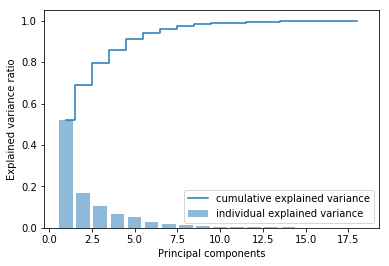

In [99]:
#Plotting The Explained Variance and Princiapl Components:

plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

**- From above we plot we can clealry observer that 8 dimensions are able to explain 95 %variance of data.**

**- We will use first 8 principal components going forward and calulate the reduced dimensions.**

**Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!**

In [100]:
#Dimensionality Reduction

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

,0,1,2,3,4,5,6,7
0,0.332393,0.218638,-1.001286,-0.177328,-0.079106,-0.754814,-0.902187,0.383358
1,-1.593741,0.420549,0.369264,-0.233484,-0.693397,-0.519073,0.376234,-0.247624
2,3.767535,-0.195041,-0.088237,-1.203129,-0.730907,0.705377,-0.032642,-0.483439
3,-1.740753,2.829579,-0.109176,-0.377522,0.363483,-0.487863,0.468613,0.022129
4,0.555239,-4.757557,-11.703588,-0.145068,-3.257651,-0.211649,2.671191,0.446380
5,5.827561,-3.694679,2.012536,0.747187,0.406009,1.524517,1.235106,-0.147010
6,-0.775683,2.209718,0.124179,-2.114733,0.193547,0.790859,-0.144332,0.399631
7,-2.143168,1.176278,-0.655833,-0.824809,1.242992,-0.645040,-0.138822,0.420043
8,-4.460389,3.098218,-0.100124,0.550995,0.568304,-0.282434,0.289319,0.384953
9,0.950982,1.839002,0.060783,0.643680,0.407446,-0.333989,0.648422,-0.897049


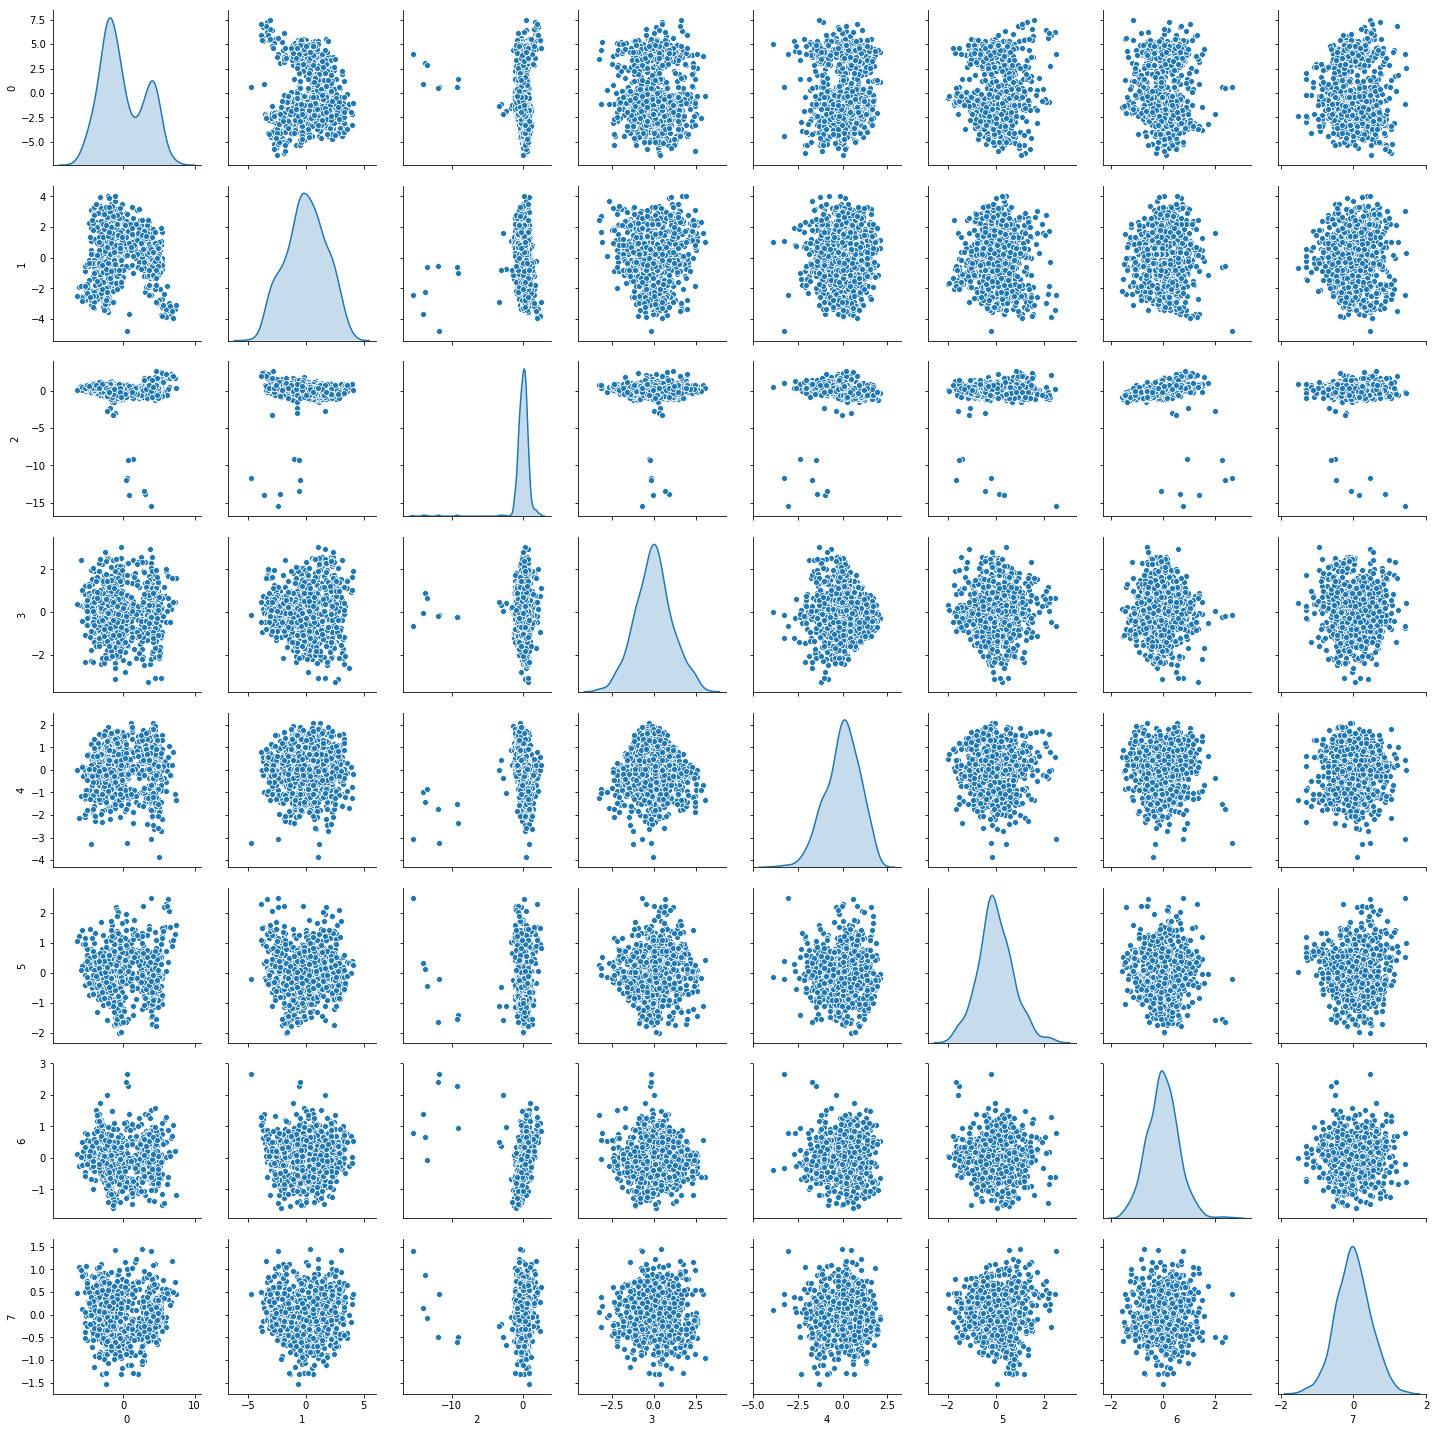

In [101]:
sns.pairplot(reduced_pca, diag_kind='kde') 
#sns.pairplot(reduced_pca1, diag_kind='kde') 

**After dimensionality reduction using PCA, the attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no linear kind of relationship.**



Fit SVC Model ON Train-test Data:

Let's build two Support Vector Classifier Model one with 18 original independent variables and the second one with only the 8 new reduced variables constructed using PCA.

In [58]:

#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=7)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=7)


In [112]:
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

num_folds = 50
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
svc = SVC()
results = cross_val_score(svc, X_std, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))



[0.94117647 0.82352941 1.         1.         1.         0.94117647
 1.         0.94117647 1.         1.         0.94117647 1.
 0.94117647 0.94117647 1.         1.         1.         0.94117647
 1.         1.         0.94117647 1.         0.94117647 1.
 0.94117647 1.         0.94117647 1.         0.94117647 1.
 1.         1.         0.94117647 1.         1.         0.94117647
 0.88235294 1.         1.         1.         0.88235294 1.
 1.         0.94117647 0.94117647 1.         0.875      1.
 1.         0.9375    ]
Accuracy: 96.919% (4.154%)


## The accuracy has increased significantly to 96.91% with 18 dimensions in use.

In [107]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)

num_folds = 50
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
svc1 = SVC()
results = cross_val_score(svc1, reduced_pca, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.94117647 0.82352941 1.         0.94117647 0.94117647 0.94117647
 1.         0.88235294 0.94117647 1.         1.         1.
 0.94117647 0.94117647 1.         0.94117647 1.         0.94117647
 1.         0.94117647 0.94117647 1.         0.82352941 1.
 0.88235294 1.         0.94117647 1.         0.94117647 1.
 0.82352941 0.94117647 0.94117647 1.         1.         0.88235294
 0.88235294 1.         1.         0.94117647 0.88235294 1.
 1.         0.94117647 0.94117647 1.         0.875      1.
 1.         0.9375    ]
Accuracy: 95.272% (5.151%)


## The accuracy has increased significantly to 95.27% with 8 dimensions in use.